### Importing necessary libraries

In [102]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
import re
from collections import Counter
from datetime import date
from datetime import datetime
from datetime import timedelta

### Reading the eventdump.csv file

In [103]:
df_events=pd.read_csv('eventdump.csv')
df_events.head()

,uuid,event,event_timestamp,properties
0,43e1796c34ac2a91,Cart is viewed,2016-08-29 02:07:56.88,"{""email_id"": ""careers24@gmail.com"", ""timeStamp"": ""29-08-2016 07:43:10"", ""No Of Products"": 1, ""Cart Value"": ""1495""}"
1,3065bf9960737af,Cart is viewed,2016-08-29 03:04:00.08,"{""email_id"": ""devangnipathak@gmail.com"", ""timeStamp"": ""29-08-2016 08:39:03"", ""No Of Products"": 4, ""Cart Value"": ""877""}"
2,636677073e9445e3,Search results page viewed,2016-08-29 00:26:23.213,"{""category"": ""Panties"", ""timeStamp"": ""29-08-2016 06:00:27""}"
3,75f156f9584ffccf,Push notification received,2016-08-29 02:31:20.89,"{""timeStamp"": ""29-08-2016 08:05:40""}"
4,651557edb4a564b0,Search is initiated,2016-08-29 03:12:53.29,"{""search_query"": ""bra for 19 years old "", ""timeStamp"": ""29-08-2016 08:49:57""}"


### Reading the uicycles.csv file

In [104]:
df_cycles=pd.read_csv('uicycles.csv')
df_cycles.head()

,uuid,os,event_type,creation_date
0,a9ba6d0cd8586a4f,Android,install,2016-08-06 19:54:47.0
1,7365ac7d0721bbf0,Android,re-install,2016-08-14 16:04:45.0
2,4bf1a1368533ad74,Android,uninstall,2016-08-06 17:40:18.0
3,8f2a30a777e2714b,Android,install,2016-08-31 05:25:24.0
4,cd002b38b452db4c,Android,install,2016-08-20 20:19:06.0


# To find the time of the day when users are most active

#### Take hour from each creation_date column and append to a list

In [105]:
hours=[]
for i in tqdm(range(len(df_events))):
    x1=df_events['event_timestamp'][i].split(" ")[1]
    x2=x1.split(":")[0]
    hours.append(x2)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 995304/995304 [00:12<00:00, 82055.37it/s]


In [106]:
len(hours)

995304

#### Make a histogram using Matplotlib

Text(0,0.5,'Frequency of the events')

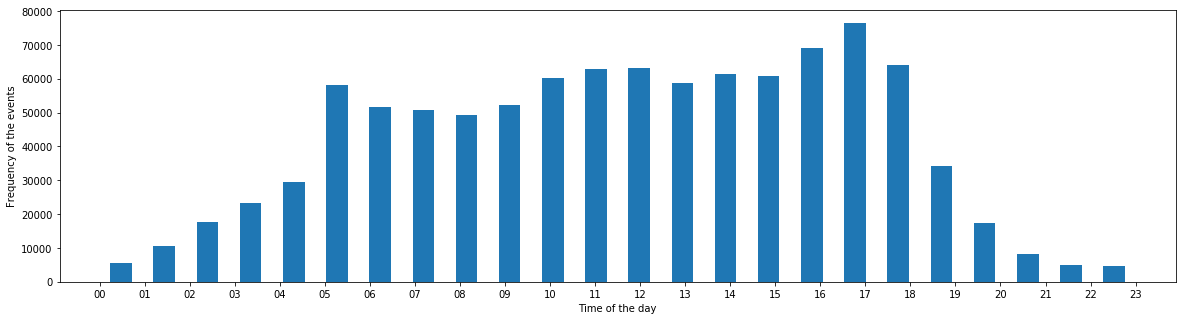

In [107]:
plt.figure(figsize=(20,5))
plt.hist(hours,bins=24,rwidth=0.5)
plt.xlabel('Time of the day')
plt.ylabel('Frequency of the events')

# Finding install-uninstall trends

In [108]:
def get_day(ts):
    d1= ts.split(" ")[0]
    d2=d1.split("-")[2]
    return d2

In [109]:
df_cycles['day']=0
df_cycles['day']=df_cycles['creation_date'].map(get_day)

In [110]:
df_cycles_installs=df_cycles[df_cycles['event_type']=='install' ]
df_cycles_reinstalls=df_cycles[df_cycles['event_type']=='re-install' ]
df_cycles_uninstalls=df_cycles[df_cycles['event_type']=='uninstall' ]


In [111]:
df_cycles_installs.head()

,uuid,os,event_type,creation_date,day
0,a9ba6d0cd8586a4f,Android,install,2016-08-06 19:54:47.0,06
3,8f2a30a777e2714b,Android,install,2016-08-31 05:25:24.0,31
4,cd002b38b452db4c,Android,install,2016-08-20 20:19:06.0,20
5,69ca9ae5f44d30ed,Android,install,2016-08-06 18:43:48.0,06
6,be86f7ceaaf66600,Android,install,2016-08-05 06:44:21.0,05


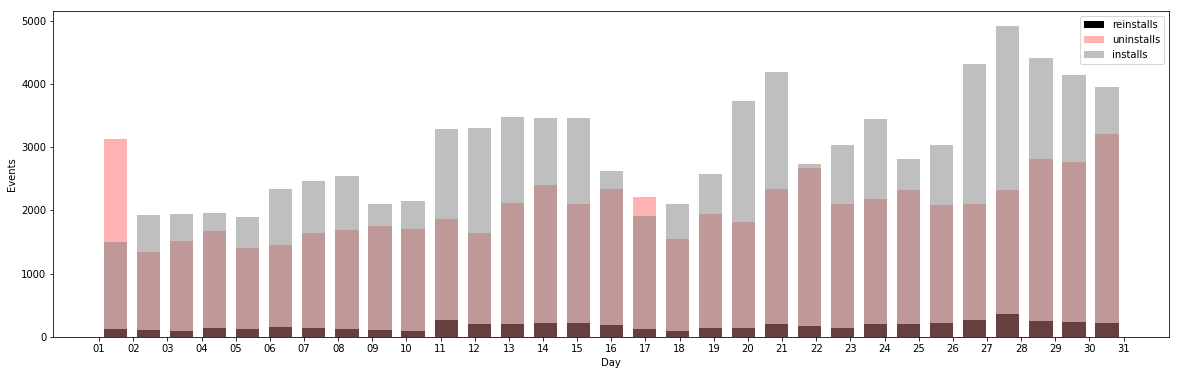

In [112]:
plt.figure(figsize=(20,6))
plt.hist(df_cycles_reinstalls['day'],bins=31,rwidth=0.7,alpha=1,label='reinstalls',color='black')
plt.hist(df_cycles_uninstalls['day'],bins=31,rwidth=0.7,alpha=0.3,label='uninstalls',color='red')
plt.hist(df_cycles_installs['day'],bins=31,rwidth=0.7,alpha=0.5,label='installs',color='gray')
plt.legend(loc='upper right')
plt.xlabel('Day')
plt.ylabel('Events')
plt.show()

#### More precise look at re-installs trends

Text(0,0.5,'Re-installs')

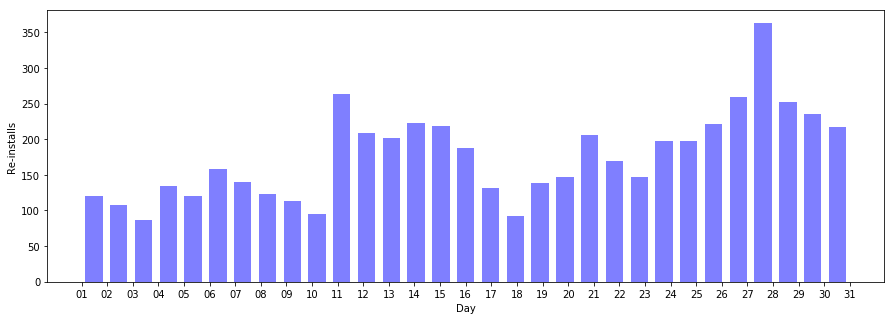

In [113]:
plt.figure(figsize=(15,5))
plt.hist(df_cycles_reinstalls['day'],bins=31,alpha=0.5,rwidth=0.7,label='reinstalls',color='blue')
plt.xlabel('Day')
plt.ylabel('Re-installs')

In [114]:
df_cycles.head()

,uuid,os,event_type,creation_date,day
0,a9ba6d0cd8586a4f,Android,install,2016-08-06 19:54:47.0,06
1,7365ac7d0721bbf0,Android,re-install,2016-08-14 16:04:45.0,14
2,4bf1a1368533ad74,Android,uninstall,2016-08-06 17:40:18.0,06
3,8f2a30a777e2714b,Android,install,2016-08-31 05:25:24.0,31
4,cd002b38b452db4c,Android,install,2016-08-20 20:19:06.0,20


# Finding the value trends in the carts

In [115]:
cart_values=[]
df_events_values=df_events[['event','properties']][(df_events['event']=="Cart is viewed")|(df_events['event']=="Place Order is initiated")]
properties_strings=df_events_values['properties'].tolist()

In [116]:
def get_number(t):
    numbers = re.findall('\d+',t)
    return int(numbers[0])

In [117]:
 for i in tqdm(range(len(properties_strings))):
        y="Value"
        x=properties_strings[i]
        if(y in x):
            x1=properties_strings[i].split("Value")[1]
            x2=x1.split("}")[0]
            x3=get_number(x2)
            cart_values.append(x3)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 131113/131113 [00:00<00:00, 339026.93it/s]


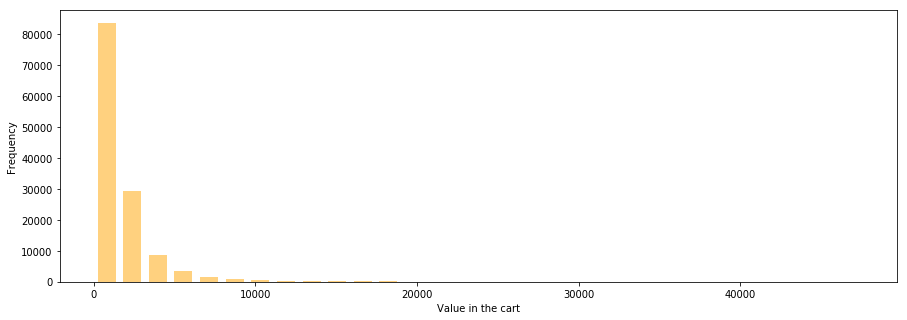

In [118]:
plt.figure(figsize=(15,5))
plt.hist(cart_values,bins=30,rwidth=0.7,alpha=0.5,label='reinstalls',color='orange')
plt.xlabel('Value in the cart')
plt.ylabel('Frequency')
plt.show()

In [119]:
purchasing_users=[]
for i in tqdm(range(len(df_events))):
    if (df_events['event'][i]=='Place Order is initiated')  and (df_events['uuid'][i] not in purchasing_users):
        purchasing_users.append(df_events['uuid'][i])
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 995304/995304 [00:11<00:00, 86235.34it/s]


# Behavioural analysis of Purchasing and non-purchasing users

#### Exploratory analysis:

In [120]:
purchasing_users[0:5]

['ccff7633ebe24a6a',
 'a31e664d8b2b6f68',
 '29f387b5dd73240a',
 '227455967360508e',
 '236a284af346285d']

In [121]:
all_users=list(df_events.uuid.unique())

In [122]:
#non_purchasing_users=[]
#for i in tqdm(range(len(all_users))):
#    if (all_users[i] not in purchasing_users) and (all_users[i] not in non_purchasing_users):
#        non_purchasing_users.append(all_users[i])

In [123]:
#non_purchasing_users[0:5]

In [124]:
events=df_events.event.unique()

index = [str(i) for i in range(1, len(events)+1)]
df_all_uniq_events=pd.DataFrame(data=events,index=index)
df_all_uniq_events

,0
1,Cart is viewed
2,Search results page viewed
3,Push notification received
4,Search is initiated
5,Product is added to cart
6,Sub-Category is viewed
7,Search icon clicked
8,Category is viewed
9,Login initiated
10,Product detail is viewed


In [125]:
df_all_uniq_events.head()

,0
1,Cart is viewed
2,Search results page viewed
3,Push notification received
4,Search is initiated
5,Product is added to cart


In [126]:
df_all_uniq_events['frequency']=0

In [127]:
#df_act_purch_users=df_all_uniq_events
#df_act_nonpurch_users=df_all_uniq_events

In [128]:
#df_events=df_events[0:100]

#### Seperating their activities

In [129]:
list_freq_act_purch_users=[]
list_freq_act_nonpurch_users=[]

for i in tqdm(range(len(df_events))):
    
    x=df_events['event'][i]
    if(df_events['uuid'][i] in purchasing_users):
        #df_act_purch_users['frequency'][df_act_purch_users[0]==x]=df_act_purch_users['frequency'][df_act_purch_users[0]==x]+1
        #print('purch')
        list_freq_act_purch_users.append(df_events['event'][i])
    else:
        #print('non-purch')
        #df_act_nonpurch_users['frequency'][df_act_nonpurch_users[0]==x]=df_act_nonpurch_users['frequency'][df_act_nonpurch_users[0]==x]+1
        list_freq_act_nonpurch_users.append(df_events['event'][i])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 995304/995304 [01:58<00:00, 8376.58it/s]


In [130]:
ls1=Counter(list_freq_act_purch_users)
ls2=Counter(list_freq_act_nonpurch_users)

In [131]:
df_1 = pd.DataFrame.from_dict(ls1, orient='index').reset_index()
df_2=  pd.DataFrame.from_dict(ls2, orient='index').reset_index()

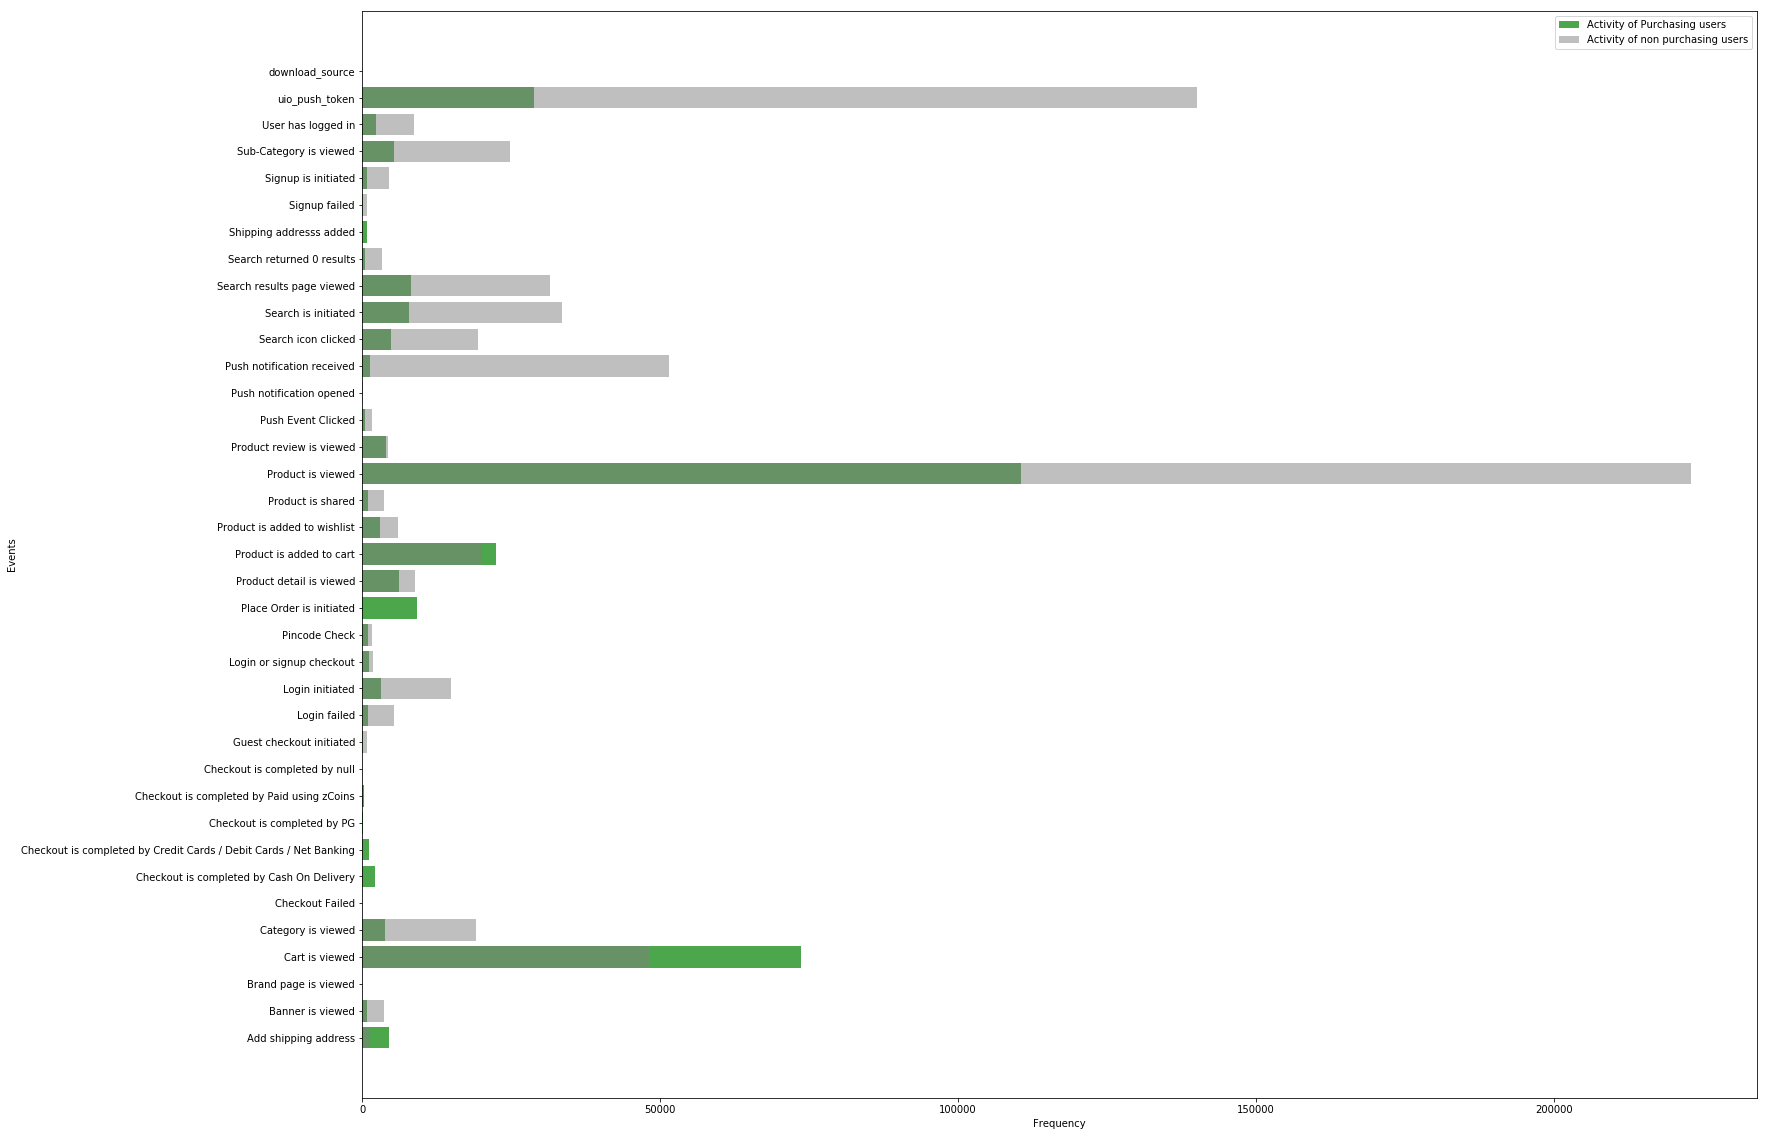

In [132]:
plt.figure(figsize=(25,20))
plt.barh(df_1['index'],df_1[0],color='green',alpha=0.7,label='Activity of Purchasing users')
plt.barh(df_2['index'],df_2[0],color='gray',alpha=0.5,label='Activity of non purchasing users')
plt.legend(loc='upper right')
plt.xlabel('Frequency')
plt.ylabel('Events')
plt.show()

# Customer retention trends

#### Exploratory analysis

In [133]:
#list_u=list(df_cycles['uuid'])
#list_u2=set(list_u)
#list_u3=list(list_u2)


In [134]:
#for i in tqdm(range(len(list_u))):
#    print()

In [135]:
df_cycles=df_cycles[['uuid','event_type','creation_date']]

In [136]:
uninst_users_list=[]
for i in tqdm(range(len(df_cycles))):
    if df_cycles['event_type'][i]=='uninstall':
        uninst_users_list.append(df_cycles['uuid'][i])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 161351/161351 [00:02<00:00, 66124.96it/s]


In [137]:
uninst_users_list[0:5]

['4bf1a1368533ad74',
 'e000e5ae9e8a6852',
 '1b85db553fd1cfa6',
 'c98632690d8b74ed',
 '19db4eff14e0ef6e']

In [138]:
#list_last_uninstalls=[]
#for k in tqdm(range(len(df_cycles))):
#    id_=df_cycles['uuid'][k]
#    d=get_last_install(id_,k)
#    list_last_uninstalls.append(d)
    

#### Function to determine last install date, given id_ and a key

In [139]:
def get_last_install(x,y):
    df_samp=df_cycles[0:y]
    df_samp2=df_samp[(df_samp['uuid']==x) & ((df_samp['event_type']=='install')|(df_samp['event_type']=='re-install'))]
    if df_samp2.empty:
        last_date='Not known'
    else:
        last_date=max(df_samp2['creation_date'])
    return last_date

In [140]:
get_last_install('c98632690d8b74ed',1)

'Not known'

In [141]:
#def get_diff_date(d1,d2):
#    return date(d1)-date(d2)

In [142]:
#get_diff_date('2016-08-06 19:54:47.0','2016-12-06 19:54:47.0')
#int('2016-08-06')

In [143]:
#list_last_uninstalls

In [144]:
#df_cycles.last_install=list_last_uninstalls

In [145]:
#df_cycles['last_install']=0
#df_cycles.head()

In [146]:
#for i in tqdm(range(len(list_last_uninstalls))):
#    df_cycles['last_install'][i]=list_last_uninstalls[i]

In [147]:
df_cycles.head()

,uuid,event_type,creation_date
0,a9ba6d0cd8586a4f,install,2016-08-06 19:54:47.0
1,7365ac7d0721bbf0,re-install,2016-08-14 16:04:45.0
2,4bf1a1368533ad74,uninstall,2016-08-06 17:40:18.0
3,8f2a30a777e2714b,install,2016-08-31 05:25:24.0
4,cd002b38b452db4c,install,2016-08-20 20:19:06.0


In [148]:
#only users who installed in the month
aug_users=df_cycles['uuid'][df_cycles['event_type']=='install']
len(aug_users.unique())

91661

In [149]:
aug_comers=df_cycles['uuid'][df_cycles['event_type']=='install']
aug_goers=df_cycles['uuid'][df_cycles['event_type']=='uninstall']
aug_re_comers=df_cycles['uuid'][df_cycles['event_type']=='re-install']

In [150]:
len(aug_goers)

64214

In [151]:
len(aug_goers.unique())

63155

In [152]:
len(aug_comers)

91662

In [153]:
len(aug_re_comers)

5475

In [154]:
len(aug_re_comers.unique())

5130

In [155]:
aug_net=df_cycles['uuid'][(df_cycles['event_type']=='install')|(df_cycles['event_type']=='re-install')]

In [156]:
len(aug_net.unique())

95767

In [157]:
#df_cycles.sort_values(by='creation_date',inplace=True)

In [158]:
df_cycles

,uuid,event_type,creation_date
0,a9ba6d0cd8586a4f,install,2016-08-06 19:54:47.0
1,7365ac7d0721bbf0,re-install,2016-08-14 16:04:45.0
2,4bf1a1368533ad74,uninstall,2016-08-06 17:40:18.0
3,8f2a30a777e2714b,install,2016-08-31 05:25:24.0
4,cd002b38b452db4c,install,2016-08-20 20:19:06.0
5,69ca9ae5f44d30ed,install,2016-08-06 18:43:48.0
6,be86f7ceaaf66600,install,2016-08-05 06:44:21.0
7,e000e5ae9e8a6852,uninstall,2016-08-07 17:41:35.0
8,27ae4470a9f5aa92,install,2016-08-15 02:53:50.0
9,863626fc1dea37,install,2016-08-03 07:22:12.0


In [159]:
df_cycles_2=df_cycles[0:25000]
df_cycles_2.head()

,uuid,event_type,creation_date
0,a9ba6d0cd8586a4f,install,2016-08-06 19:54:47.0
1,7365ac7d0721bbf0,re-install,2016-08-14 16:04:45.0
2,4bf1a1368533ad74,uninstall,2016-08-06 17:40:18.0
3,8f2a30a777e2714b,install,2016-08-31 05:25:24.0
4,cd002b38b452db4c,install,2016-08-20 20:19:06.0


In [160]:
df_cycles_2.sort_values(by='creation_date',inplace=True)
df_cycles_2 = df_cycles_2.reset_index(drop=True)

C:\Users\Sumanth_47\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Functions to caluclate end date of the cycle and duration of the cycle

In [161]:
def get_end_date(x,i):
    u='Still active'
    df_test=df_cycles_2[x+1:]
    df_test_2=df_test[(df_test['uuid']==i) & (df_test['event_type']=='uninstall')]
    if df_test_2.empty:
        return u
    else:
        last_date=min(df_test_2['creation_date'])
        return last_date

In [162]:
def get_gap(x,y):
    x1=x.split(" ")[0]
    y1=y.split(" ")[0]
    x_d=datetime.strptime(x1, '%Y-%m-%d').date()
    y_d=datetime.strptime(y1, '%Y-%m-%d').date()
    g=y_d-x_d
    return g.days

In [163]:
def get_date_from_str(x):
    x1=x.split(" ")[0]
    x_d=datetime.strptime(x1, '%Y-%m-%d').date()
    return x_d

#### Appending all to a list

In [164]:
arr=[]
for i in tqdm(range(len(df_cycles_2))):
    if (df_cycles_2['event_type'][i]=='install') or (df_cycles_2['event_type'][i]=='re-install'):
        start=df_cycles_2['creation_date'][i]
        id_=df_cycles_2['uuid'][i]
        end=get_end_date(i,id_)
        if(end == 'Still active'):
            gap='Still counting'
        else:
            gap=get_gap(start,end)        
        x=[id_,start,end,gap]
        arr.append(x)
    else:
        t=0

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25000/25000 [00:53<00:00, 471.10it/s]


In [165]:
arr[0:10]

[['c6b71209ed50c5e2', '2016-08-01 03:24:23.0', '2016-08-03 17:34:27.0', 2],
 ['ed7bde31467b2708',
  '2016-08-01 03:28:52.0',
  'Still active',
  'Still counting'],
 ['6cbed1d0f24f34f4', '2016-08-01 03:29:14.0', '2016-08-02 05:45:22.0', 1],
 ['f34e5ad7be2ded4e', '2016-08-01 03:30:46.0', '2016-08-10 17:32:52.0', 9],
 ['68d233c78a9908c9', '2016-08-01 03:30:59.0', '2016-08-02 05:45:22.0', 1]]

#### Converting List to Data Frame

In [166]:
columns = ['uuid','start_date', 'end_date','span of the cycle(in days)']
df_cycle_span = pd.DataFrame(arr,columns=columns)
df_cycle_span.index.names = ['Cycle_id']

In [167]:
df_cycle_span.head()

,uuid,start_date,end_date,span of the cycle(in days)
Cycle_id,,,,
0,c6b71209ed50c5e2,2016-08-01 03:24:23.0,2016-08-03 17:34:27.0,2
1,ed7bde31467b2708,2016-08-01 03:28:52.0,Still active,Still counting
2,6cbed1d0f24f34f4,2016-08-01 03:29:14.0,2016-08-02 05:45:22.0,1
3,f34e5ad7be2ded4e,2016-08-01 03:30:46.0,2016-08-10 17:32:52.0,9
4,68d233c78a9908c9,2016-08-01 03:30:59.0,2016-08-02 05:45:22.0,1


In [168]:
df_3=df_cycle_span[df_cycle_span['span of the cycle(in days)']!='Still counting']

In [169]:
df_3.head()

,uuid,start_date,end_date,span of the cycle(in days)
Cycle_id,,,,
0,c6b71209ed50c5e2,2016-08-01 03:24:23.0,2016-08-03 17:34:27.0,2
2,6cbed1d0f24f34f4,2016-08-01 03:29:14.0,2016-08-02 05:45:22.0,1
3,f34e5ad7be2ded4e,2016-08-01 03:30:46.0,2016-08-10 17:32:52.0,9
4,68d233c78a9908c9,2016-08-01 03:30:59.0,2016-08-02 05:45:22.0,1
6,fe43146d11c8eaad,2016-08-01 03:38:04.0,2016-08-04 05:35:13.0,3


In [170]:
df_3.sort_values(by='span of the cycle(in days)', ascending= False).head()

,uuid,start_date,end_date,span of the cycle(in days)
Cycle_id,,,,
196,ba71230379071758,2016-08-01 17:09:37.0,2016-08-31 05:36:42.0,30
609,afa5ef79d93df3ad,2016-08-02 19:46:27.0,2016-08-31 18:41:37.0,29
395,47d24726735de54a,2016-08-02 11:10:36.0,2016-08-31 18:41:36.0,29
686,d7abf451eecfd1e7,2016-08-03 06:51:10.0,2016-08-31 18:41:38.0,28
917,16e390314888a2a7,2016-08-03 18:46:13.0,2016-08-31 05:36:48.0,28


In [171]:
hist_span=list(df_3['span of the cycle(in days)'])

Text(0,0.5,'Frequency')

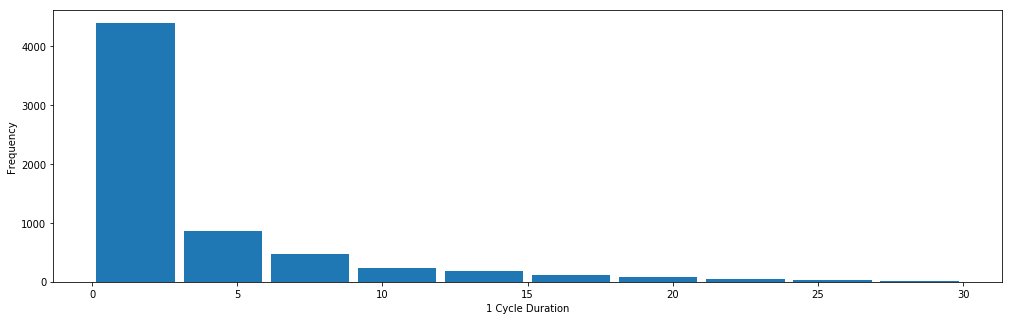

In [172]:
plt.figure(figsize=(17,5))
plt.hist(hist_span,bins=10,rwidth=0.9)
plt.xlabel('1 Cycle Duration')
plt.ylabel('Frequency')

## Distribution of purchases i.e. Total number and total value of the purchases in one cycle and total purchases in week 1, week 2 and week 3 

In [173]:
df_events.head()

,uuid,event,event_timestamp,properties
0,43e1796c34ac2a91,Cart is viewed,2016-08-29 02:07:56.88,"{""email_id"": ""careers24@gmail.com"", ""timeStamp"": ""29-08-2016 07:43:10"", ""No Of Products"": 1, ""Cart Value"": ""1495""}"
1,3065bf9960737af,Cart is viewed,2016-08-29 03:04:00.08,"{""email_id"": ""devangnipathak@gmail.com"", ""timeStamp"": ""29-08-2016 08:39:03"", ""No Of Products"": 4, ""Cart Value"": ""877""}"
2,636677073e9445e3,Search results page viewed,2016-08-29 00:26:23.213,"{""category"": ""Panties"", ""timeStamp"": ""29-08-2016 06:00:27""}"
3,75f156f9584ffccf,Push notification received,2016-08-29 02:31:20.89,"{""timeStamp"": ""29-08-2016 08:05:40""}"
4,651557edb4a564b0,Search is initiated,2016-08-29 03:12:53.29,"{""search_query"": ""bra for 19 years old "", ""timeStamp"": ""29-08-2016 08:49:57""}"


In [174]:
def get_purchase_number(i,s,e):
    df_9=df_cycle_3[(df_cycle_3['uuid']==i) & (df_cycle_3['event']=='Place Order is initiated')]
    df_11=df_9[(df_cycle_3['date']>=s) & (df_9['date']<=e)]
    
    return len(df_11)

In [175]:
arr_4=[]
for i in tqdm(range(len(df_events))):
    ev=df_events['event'][i]
    id_=df_events['uuid'][i]
    dat=df_events['event_timestamp'][i]
    dat_2=get_date_from_str(dat)
    prop=df_events['properties'][i]
    arr_4.append([id_,ev,dat_2,prop])


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 995304/995304 [01:08<00:00, 14463.41it/s]


In [176]:
cols = ['uuid','event','date','prop']
df_cycle_3 = pd.DataFrame(arr_4,columns=cols)
#df_cycle_3.index.names = ['uuid']

In [177]:
def get_purchase_number_2(i,s,e):
    df_9=df_cycle_3[(df_cycle_3['uuid']==i) & (df_cycle_3['event']=='Place Order is initiated')]
    df_11=df_9[(df_9['date']>=s+timedelta(days=7)) & (df_9['date']<s+timedelta(days=14))]
    
    return len(df_11)

def get_purchase_number_3(i,s,e):
    df_9=df_cycle_3[(df_cycle_3['uuid']==i) & (df_cycle_3['event']=='Place Order is initiated')]
    df_11=df_9[(df_9['date']>=s+timedelta(days=14)) & (df_9['date']<s+timedelta(days=21))]
    
    return len(df_11)

def get_purchase_number_1(i,s,e):
    df_9=df_cycle_3[(df_cycle_3['uuid']==i) & (df_cycle_3['event']=='Place Order is initiated')]
    df_11=df_9[(df_9['date']>=s) & (df_9['date']<s+timedelta(days=7))]
    
    return len(df_11)

In [178]:
def get_purchase_value(i,s,e):
    df_9=df_cycle_3[(df_events['uuid']==i) & (df_cycle_3['event']=='Place Order is initiated')]
    df_11=df_9[(df_9['date']>=s) & (df_9['date']<=e)]
    total=0
    for j in range(len(df_11)):
        
        v=list(df_11['prop'])
        v1=v[j].split("Value")[1]
        v2=v1.split("}")[0]
        
        val_s=get_number(v2)
        
        val_int=int(val_s)
        
        total=total+val_int
               



    return total

In [179]:
df_cycle_3.head()

,uuid,event,date,prop
0,43e1796c34ac2a91,Cart is viewed,2016-08-29,"{""email_id"": ""careers24@gmail.com"", ""timeStamp"": ""29-08-2016 07:43:10"", ""No Of Products"": 1, ""Cart Value"": ""1495""}"
1,3065bf9960737af,Cart is viewed,2016-08-29,"{""email_id"": ""devangnipathak@gmail.com"", ""timeStamp"": ""29-08-2016 08:39:03"", ""No Of Products"": 4, ""Cart Value"": ""877""}"
2,636677073e9445e3,Search results page viewed,2016-08-29,"{""category"": ""Panties"", ""timeStamp"": ""29-08-2016 06:00:27""}"
3,75f156f9584ffccf,Push notification received,2016-08-29,"{""timeStamp"": ""29-08-2016 08:05:40""}"
4,651557edb4a564b0,Search is initiated,2016-08-29,"{""search_query"": ""bra for 19 years old "", ""timeStamp"": ""29-08-2016 08:49:57""}"


### !!!!   Note: Only top 50 rows are considered as computing for complete data set takes a very long time

In [180]:
purr=[]
for i in tqdm(range(50)):
    id_=df_cycle_span['uuid'][i]
    end=df_cycle_span['end_date'][i]
    st=df_cycle_span['start_date'][i]
    
    st_1=get_date_from_str(st)
    
    if(end[0]=='S'):
        end_1=df_cycle_3['date'].max()
    else:
        end_1=get_date_from_str(end)
    
    df_11=df_cycle_3[(df_cycle_3['date']>=st_1) & (df_cycle_3['date']<=end_1)]
    
    week_1=get_purchase_number_1(id_,st_1,end_1)
    week_2=get_purchase_number_2(id_,st_1,end_1)
    week_3=get_purchase_number_3(id_,st_1,end_1)
    
    pur_val=get_purchase_value(id_,st_1,end_1)
    
    pur=get_purchase_number(id_,st_1,end_1)

    
    purr.append([pur,week_1,week_2,week_3,pur_val])

  0%|                                                                                                                                                                                                                                                  | 0/50 [00:00<?, ?it/s]C:\Users\Sumanth_47\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:13<00:00,  1.48s/it]


In [181]:
pur_val=get_purchase_value(id_,st_1,end_1)

In [182]:
df_cycle_3[df_cycle_3['event']=='Place Order is initiated'].head()

,uuid,event,date,prop
292091,ccff7633ebe24a6a,Place Order is initiated,2016-08-25,"{""email_id"": ""chithraskumar@gmail.com"", ""timeStamp"": ""25-08-2016 04:12:44"", ""No Of Products"": 4, ""Cart Value"": ""2974""}"
292151,a31e664d8b2b6f68,Place Order is initiated,2016-08-25,"{""email_id"": ""mekunjita@gmail.com"", ""timeStamp"": ""25-08-2016 03:10:31"", ""No Of Products"": 1, ""Cart Value"": ""431""}"
292211,29f387b5dd73240a,Place Order is initiated,2016-08-25,"{""email_id"": ""priyankachhibbarcute@gmail.com"", ""timeStamp"": ""25-08-2016 07:20:29"", ""No Of Products"": 2, ""Cart Value"": ""987""}"
292271,227455967360508e,Place Order is initiated,2016-08-25,"{""email_id"": ""csanghita94@yahoo.com"", ""timeStamp"": ""25-08-2016 04:41:08"", ""No Of Products"": 2, ""Cart Value"": ""668""}"
292331,236a284af346285d,Place Order is initiated,2016-08-25,"{""email_id"": ""shwethanath2@gmail.com"", ""timeStamp"": ""25-08-2016 06:16:36"", ""No Of Products"": 2, ""Cart Value"": ""2490""}"


In [183]:
col = ['Total Purchases','in week 1', 'in week 2','in week 3','total value of purchaces']
df_purchases = pd.DataFrame(purr,columns=col)
#df_purchases.index.names = ['Cycle_id']

### Following Data frame gives total number of purchases of each cycle, number of purchases in week 1, week 2 and week 3 of the cycle and total value of the purchases of each cycle. 

In [184]:
df_purchases.index.name = 'Cycle ID'
df_purchases

,Total Purchases,in week 1,in week 2,in week 3,total value of purchaces
Cycle ID,,,,,
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,0


Text(0,0.5,'Frequency')

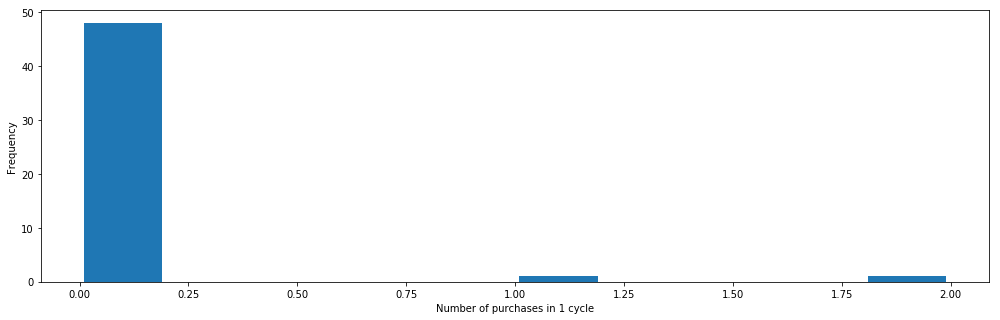

In [185]:
plt.figure(figsize=(17,5))
plt.hist(df_purchases['Total Purchases'],bins=10,rwidth=0.9)
plt.xlabel('Number of purchases in 1 cycle')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

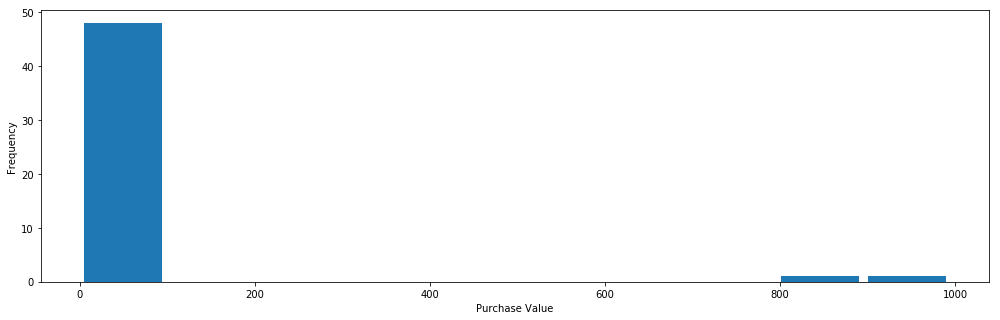

In [186]:
plt.figure(figsize=(17,5))
plt.hist(df_purchases['total value of purchaces'],bins=10,rwidth=0.9)
plt.xlabel('Purchase Value')
plt.ylabel('Frequency')

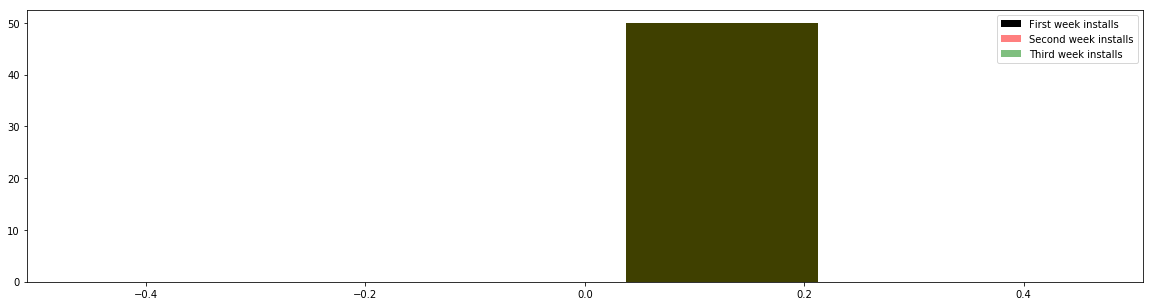

In [187]:
plt.figure(figsize=(20,5))
plt.hist(df_purchases['in week 1'],bins=4,rwidth=0.7,alpha=1,label='First week installs',color='black')
plt.hist(df_purchases['in week 2'],bins=4,rwidth=0.7,alpha=0.5,label='Second week installs',color='red')
plt.hist(df_purchases['in week 3'],bins=4,rwidth=0.7,alpha=0.5,label='Third week installs',color='green')
plt.legend(loc='upper right')
plt.show()

## Search Analysis

In [188]:
df_events.head()

,uuid,event,event_timestamp,properties
0,43e1796c34ac2a91,Cart is viewed,2016-08-29 02:07:56.88,"{""email_id"": ""careers24@gmail.com"", ""timeStamp"": ""29-08-2016 07:43:10"", ""No Of Products"": 1, ""Cart Value"": ""1495""}"
1,3065bf9960737af,Cart is viewed,2016-08-29 03:04:00.08,"{""email_id"": ""devangnipathak@gmail.com"", ""timeStamp"": ""29-08-2016 08:39:03"", ""No Of Products"": 4, ""Cart Value"": ""877""}"
2,636677073e9445e3,Search results page viewed,2016-08-29 00:26:23.213,"{""category"": ""Panties"", ""timeStamp"": ""29-08-2016 06:00:27""}"
3,75f156f9584ffccf,Push notification received,2016-08-29 02:31:20.89,"{""timeStamp"": ""29-08-2016 08:05:40""}"
4,651557edb4a564b0,Search is initiated,2016-08-29 03:12:53.29,"{""search_query"": ""bra for 19 years old "", ""timeStamp"": ""29-08-2016 08:49:57""}"


In [189]:
df_events_search=df_events[df_events['event']=='Search is initiated']
df_events_search.head()

,uuid,event,event_timestamp,properties
4,651557edb4a564b0,Search is initiated,2016-08-29 03:12:53.29,"{""search_query"": ""bra for 19 years old "", ""timeStamp"": ""29-08-2016 08:49:57""}"
8,58a06d3a55470575,Search is initiated,2016-08-29 01:01:46.307,"{""search_query"": ""belts in All Accessories"", ""timeStamp"": ""28-08-2016 06:08:25""}"
12,76e9932ad9a9eaae,Search is initiated,2016-08-29 03:21:13.357,"{""search_query"": ""triumph in Brands"", ""timeStamp"": ""30-08-2016 09:02:22""}"
17,3d1a0156889ec565,Search is initiated,2016-08-29 00:20:25.84,"{""search_query"": ""bra straps in All Accessories"", ""timeStamp"": ""29-08-2016 05:57:22""}"
18,e90121e9fa00730f,Search is initiated,2016-08-29 02:29:57.107,"{""search_query"": ""nightwears in All Nightwear"", ""timeStamp"": ""29-08-2016 08:08:27""}"


In [190]:
search_items=[]
list_properties_items=list(df_events_search['properties'])

In [191]:
list_properties_items[0:5]

['{"search_query": "bra for 19 years old ", "timeStamp": "29-08-2016 08:49:57"}',
 '{"search_query": "belts in All Accessories", "timeStamp": "28-08-2016 06:08:25"}',
 '{"search_query": "triumph in Brands", "timeStamp": "30-08-2016 09:02:22"}',
 '{"search_query": "bra straps in All Accessories", "timeStamp": "29-08-2016 05:57:22"}',
 '{"search_query": "nightwears in All Nightwear", "timeStamp": "29-08-2016 08:08:27"}']

In [192]:
for i in tqdm(range(len(list_properties_items))):
    s=list_properties_items[i].split(': "')[1]
    s1=s.split('"')[0]
    
    search_items.append(s1)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 41346/41346 [00:00<00:00, 598313.90it/s]


In [193]:
list_properties_items[3].split(': "')[1]
s1=s1.split('"')[0]
s

'aqua", "timeStamp"'

In [194]:
search_items[0:5]

['bra for 19 years old ',
 'belts in All Accessories',
 'triumph in Brands',
 'bra straps in All Accessories',
 'nightwears in All Nightwear']

### If all items table was available, then above list can be linked with it based on likelyhood to find what product is being searched exactly and also find most popular items at a given time